In [1]:
from cooltools.eigdecomp import cis_eig


In [66]:
import cooler
cool = cooler.Cooler('K562_hg19_chr3_50K.cool')
mat = cool.matrix(balance=True)[:]

In [4]:
print(cool)

<Cooler "K562_hg19_chr3_50K.cool::/">


In [5]:
print(mat)

[[         nan          nan          nan ...          nan          nan
           nan]
 [         nan   0.         428.52640111 ...          nan          nan
           nan]
 [         nan 428.52640111   0.         ...          nan          nan
           nan]
 ...
 [         nan          nan          nan ...          nan          nan
           nan]
 [         nan          nan          nan ...          nan          nan
           nan]
 [         nan          nan          nan ...          nan          nan
           nan]]


In [16]:
cis_eig(mat, n_eigs=1, phasing_track=track, 
                            ignore_diags=2, clip_percentile=0, sort_metric=None)

(array([5531.58103207]),
 array([[        nan, -0.07931084,  0.08391484, ...,         nan,
                 nan,         nan]]))

In [14]:
import numpy as np

In [32]:
track=open("hg19_GC_chr3_50K.txt")
track= np.loadtxt(track)
track

array([0.     , 0.16752, 0.23058, ..., 0.22148, 0.06538, 0.     ])

In [126]:
a= cis_eig(mat, n_eigs=1,phasing_track=track)
a


(array([5531.58103207]),
 array([[        nan, -0.07931084,  0.08391484, ...,         nan,
                 nan,         nan]]))

In [122]:
eigen_vec= cis_eig(mat, n_eigs=1,phasing_track=track)[1][0]
eigen_vec


array([        nan, -0.07931084,  0.08391484, ...,         nan,
               nan,         nan])

In [51]:
import cooltools.lib.plotting

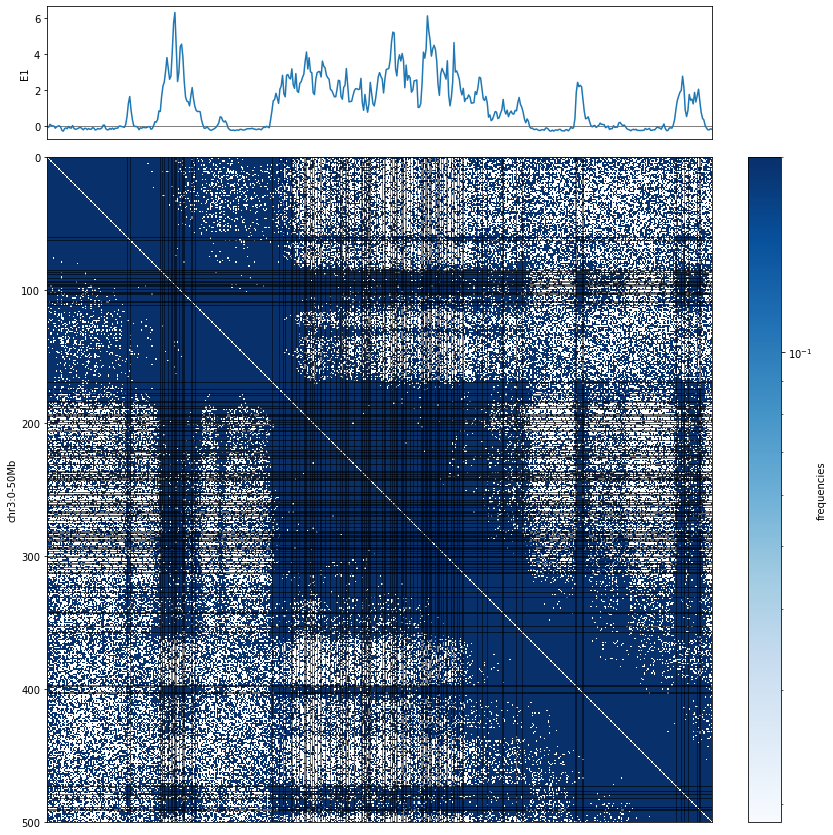

In [124]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, subprocess 
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid import make_axes_locatable

f, ax = plt.subplots(
    figsize=(20, 15),
)

norm = LogNorm(vmax=0.2)

im = ax.matshow(
    cool.matrix()[:],
    norm=norm,
    cmap='Blues'
);
plt.axis([0,500,500,0])


divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.5)
plt.colorbar(im, cax=cax, label='frequencies');
ax.set_ylabel('chr3:0-50Mb')
ax.xaxis.set_visible(False)

ax1 = divider.append_axes("top", size="20%", pad=0.25, sharex=ax)
weights = cool.bins()[:]['weight'].values
ax1.plot([0,500],[0,0],'k',lw=0.50)
ax1.plot( eigen_vec, label='E1')

ax1.set_ylabel('E1')
ax1.set_xticks([]);


for i in np.where(np.diff((eigen_vec).astype(int)))[0]:
    ax.plot([0, 500],[i,i],'k',lw=0.6)
    ax.plot([i,i],[0, 500],'k',lw=0.5)

In [137]:
df=cool.bins()[:]
df
##Make a dataframe of the orginal .cool file

,chrom,start,end,KR,VC,VC_SQRT,weight
0,1,0,50000,NaN,0.000000,0.000000,NaN
1,1,50000,100000,0.481399,0.454753,0.624701,0.481399
2,1,100000,150000,1.004706,1.022134,0.936567,1.004706
3,1,150000,200000,0.816198,0.811718,0.834617,0.816198
4,1,200000,250000,0.753308,0.738841,0.796270,0.753308
...,...,...,...,...,...,...,...
3956,1,197800000,197850000,0.725663,0.707570,0.779237,0.725663
3957,1,197850000,197900000,0.160957,0.126409,0.329362,0.160957
3958,1,197900000,197950000,NaN,0.001855,0.039899,NaN
3959,1,197950000,198000000,NaN,0.000000,0.000000,NaN


In [138]:
df['eigen_vec'] = eigen_vec.tolist()

##Add the first eigen vectors to the dataframe

In [139]:
df

,chrom,start,end,KR,VC,VC_SQRT,weight,eigen_vec
0,1,0,50000,NaN,0.000000,0.000000,NaN,NaN
1,1,50000,100000,0.481399,0.454753,0.624701,0.481399,-0.079311
2,1,100000,150000,1.004706,1.022134,0.936567,1.004706,0.083915
3,1,150000,200000,0.816198,0.811718,0.834617,0.816198,0.020302
4,1,200000,250000,0.753308,0.738841,0.796270,0.753308,-0.004100
...,...,...,...,...,...,...,...,...
3956,1,197800000,197850000,0.725663,0.707570,0.779237,0.725663,0.499733
3957,1,197850000,197900000,0.160957,0.126409,0.329362,0.160957,-0.377151
3958,1,197900000,197950000,NaN,0.001855,0.039899,NaN,NaN
3959,1,197950000,198000000,NaN,0.000000,0.000000,NaN,NaN


In [141]:
df.to_csv('eigen_vec.csv')
##Make CSV file of the dataframe with eigen vector scores, later I converted this CSV to a bed file in the command line 
## I used the following command in the command line to make a .bed file: $mv eigen_vec.csv  eigen_vec.bed

## Part 2

In [150]:
df1 = pd.read_csv('K562_hg19_FPKM_chr3.bed', sep='\t', header=None)
df1.columns=["chr",'start','stop','gene','expression','sign']
df1

,chr,start,stop,gene,expression,sign
0,chr3,238279,451090,CHL1,0.00,+
1,chr3,1134260,1445901,CNTN6,0.00,+
2,chr3,2140497,3099645,CNTN4,0.01,+
3,chr3,3111233,3168297,IL5RA,0.14,-
4,chr3,3168600,3192563,TRNT1,25.28,+
...,...,...,...,...,...,...
1059,chr3,197464050,197514467,FYTTD1,53.14,+
1060,chr3,197518097,197615307,LRCH3,24.13,+
1061,chr3,197615946,197687013,IQCG,3.70,-
1062,chr3,197676858,197683481,RPL35A,1195.67,+


In [184]:
x=np.log2(df1['expression']+1)
Transformed=x.to_frame(name=None)
Transformed

,expression
0,0.000000
1,0.000000
2,0.014355
3,0.189034
4,4.715893
...,...
1059,5.758623
1060,4.651339
1061,2.232661
1062,10.224810


In [200]:
#listt = Transformed['expression'].tolist()


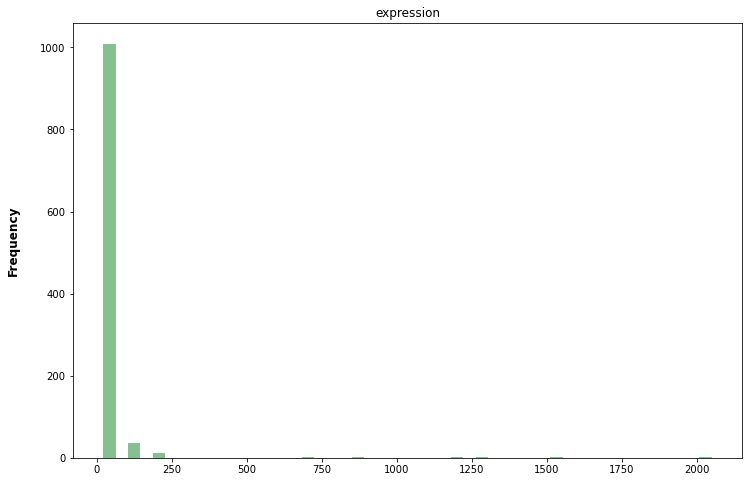

In [170]:
ax = df1.hist(column='expression', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.5)
ax = ax[0]
for x in ax:
    x.set_ylabel("Frequency", labelpad=20, weight='bold', size=12)

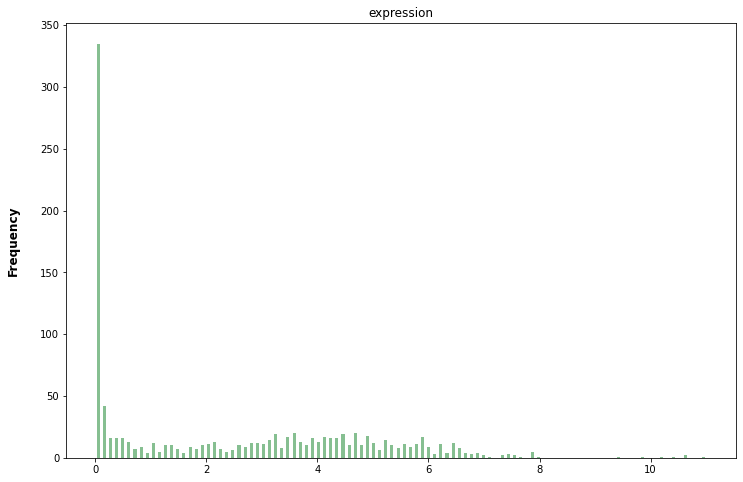

In [253]:
##Transformed histogram
ax = Transformed.hist(column='expression', bins=100, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.5)
ax = ax[0]
for a in ax:
    a.set_ylabel("Frequency", labelpad=20, weight='bold', size=12)
    
    

In [255]:
df2 = pd.read_csv('K562_hg19_FPKM_chr3_compartment.bed', sep='\t', header=None)
df2.columns=["chr",'start','stop','gene','expression','sign','compartment','NA']
df2

,chr,start,stop,gene,expression,sign,compartment,NA
0,chr3,238279,451090,CHL1,0.00,+,2.025680e-06,.
1,chr3,1134260,1445901,CNTN6,0.00,+,1.432470e-06,.
2,chr3,2140497,3099645,CNTN4,0.01,+,6.474360e-07,.
3,chr3,3111233,3168297,IL5RA,0.14,-,3.282810e-05,.
4,chr3,3168600,3192563,TRNT1,25.28,+,1.231220e-05,.
...,...,...,...,...,...,...,...,...
1059,chr3,197464050,197514467,FYTTD1,53.14,+,7.854960e-06,.
1060,chr3,197518097,197615307,LRCH3,24.13,+,4.023470e-06,.
1061,chr3,197615946,197687013,IQCG,3.70,-,6.705390e-06,.
1062,chr3,197676858,197683481,RPL35A,1195.67,+,4.869980e-05,.


In [ ]:
##Sepearte by A (+) and B (-) compartments to plot
##Seperate by Expression levele to plot

In [256]:
x=df2.sort_values(by=['sign'])
x

,chr,start,stop,gene,expression,sign,compartment,NA
0,chr3,238279,451090,CHL1,0.00,+,0.000002,.
569,chr3,111697857,111712210,ABHD10,8.30,+,0.000029,.
570,chr3,111717511,111732734,TAGLN3,0.04,+,0.000182,.
571,chr3,111753690,111800116,TMPRSS7,0.00,+,0.000039,.
572,chr3,111805182,111849851,C3orf52,2.53,+,0.000019,.
...,...,...,...,...,...,...,...,...
610,chr3,119243140,119278449,CD80,7.13,-,0.000014,.
210,chr3,43120724,43147568,POMGNT2,8.77,-,0.000040,.
613,chr3,119355304,119384171,POPDC2,0.74,-,0.000034,.
217,chr3,44540462,44552128,ZNF852,7.80,-,0.000031,.


In [257]:
df2 = x.reset_index(drop=True)
df2

,chr,start,stop,gene,expression,sign,compartment,NA
0,chr3,238279,451090,CHL1,0.00,+,0.000002,.
1,chr3,111697857,111712210,ABHD10,8.30,+,0.000029,.
2,chr3,111717511,111732734,TAGLN3,0.04,+,0.000182,.
3,chr3,111753690,111800116,TMPRSS7,0.00,+,0.000039,.
4,chr3,111805182,111849851,C3orf52,2.53,+,0.000019,.
...,...,...,...,...,...,...,...,...
1059,chr3,119243140,119278449,CD80,7.13,-,0.000014,.
1060,chr3,43120724,43147568,POMGNT2,8.77,-,0.000040,.
1061,chr3,119355304,119384171,POPDC2,0.74,-,0.000034,.
1062,chr3,44540462,44552128,ZNF852,7.80,-,0.000031,.


In [258]:
listt=[]
for i in df2['sign']:
    if i == '+':
        listt.append(i)

        

In [259]:
x=df2.loc[:524]
x

,chr,start,stop,gene,expression,sign,compartment,NA
0,chr3,238279,451090,CHL1,0.00,+,2.025680e-06,.
1,chr3,111697857,111712210,ABHD10,8.30,+,2.853020e-05,.
2,chr3,111717511,111732734,TAGLN3,0.04,+,1.815360e-04,.
3,chr3,111753690,111800116,TMPRSS7,0.00,+,3.908710e-05,.
4,chr3,111805182,111849851,C3orf52,2.53,+,1.863200e-05,.
...,...,...,...,...,...,...,...,...
520,chr3,9834766,9877085,ARPC4-TTLL3,48.09,+,8.396740e-06,.
521,chr3,29322473,30051886,RBMS3,0.00,+,5.837970e-07,.
522,chr3,49044495,49053386,WDR6,58.71,+,3.954640e-05,.
523,chr3,9849770,9896822,TTLL3,63.01,+,8.351550e-06,.


In [260]:
y=df2.loc[525:]
y

,chr,start,stop,gene,expression,sign,compartment,NA
525,chr3,156864297,156878549,CCNL1,75.02,-,0.000021,.
526,chr3,155538813,155572218,SLC33A1,15.31,-,0.000010,.
527,chr3,138722804,138725110,PRR23A,0.00,-,0.000403,.
528,chr3,137980279,138048728,NME9,0.00,-,0.000016,.
529,chr3,138737873,138739768,PRR23B,0.00,-,0.000224,.
...,...,...,...,...,...,...,...,...
1059,chr3,119243140,119278449,CD80,7.13,-,0.000014,.
1060,chr3,43120724,43147568,POMGNT2,8.77,-,0.000040,.
1061,chr3,119355304,119384171,POPDC2,0.74,-,0.000034,.
1062,chr3,44540462,44552128,ZNF852,7.80,-,0.000031,.


In [241]:
pip install seaborn

     |████████████████████████████████| 292 kB 3.9 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [261]:
import seaborn

/Users/cmdb/miniconda3/envs/hic/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='compartment'>

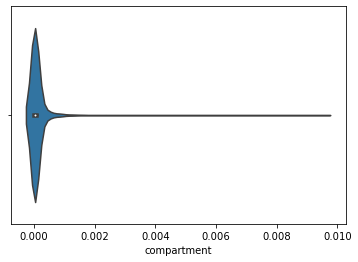

In [265]:
##Ploting for a campartment
seaborn.violinplot(x["compartment"])

/Users/cmdb/miniconda3/envs/hic/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='compartment'>

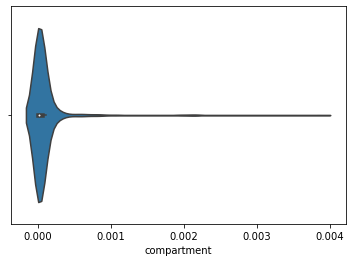

In [266]:
##Ploting for B compartment
seaborn.violinplot(y["compartment"])

In [269]:
expressed_compartment=df2[df2.expression > 1.5]
expressed_compartment

,chr,start,stop,gene,expression,sign,compartment,NA
1,chr3,111697857,111712210,ABHD10,8.30,+,0.000029,.
4,chr3,111805182,111849851,C3orf52,2.53,+,0.000019,.
6,chr3,112280556,112304424,SLC35A5,6.25,+,0.000014,.
7,chr3,112709765,112733907,GTPBP8,10.13,+,0.000020,.
10,chr3,113465866,113530903,ATP6V1A,24.14,+,0.000006,.
...,...,...,...,...,...,...,...,...
1058,chr3,43396351,43733086,ANO10,22.36,-,0.000001,.
1059,chr3,119243140,119278449,CD80,7.13,-,0.000014,.
1060,chr3,43120724,43147568,POMGNT2,8.77,-,0.000040,.
1062,chr3,44540462,44552128,ZNF852,7.80,-,0.000031,.


/Users/cmdb/miniconda3/envs/hic/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='expression'>

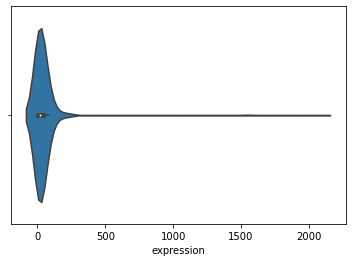

In [271]:
##Ploting for expressed compartment
seaborn.violinplot(expressed_compartment["expression"])

In [270]:
repressed_compartment=df2[df2.expression < 1.5]
repressed_compartment

,chr,start,stop,gene,expression,sign,compartment,NA
0,chr3,238279,451090,CHL1,0.00,+,2.025680e-06,.
2,chr3,111717511,111732734,TAGLN3,0.04,+,1.815360e-04,.
3,chr3,111753690,111800116,TMPRSS7,0.00,+,3.908710e-05,.
5,chr3,112051194,112081659,CD200,0.00,+,6.604820e-05,.
8,chr3,112929850,113006303,BOC,0.00,+,4.043960e-05,.
...,...,...,...,...,...,...,...,...
1049,chr3,113847499,113918254,DRD3,0.00,-,2.146070e-05,.
1050,chr3,113953483,113956425,ZNF80,0.13,-,1.113970e-03,.
1051,chr3,114056941,114866118,ZBTB20,0.24,-,1.115440e-06,.
1052,chr3,115521235,117716095,LSAMP,0.00,-,3.994670e-07,.


/Users/cmdb/miniconda3/envs/hic/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='expression'>

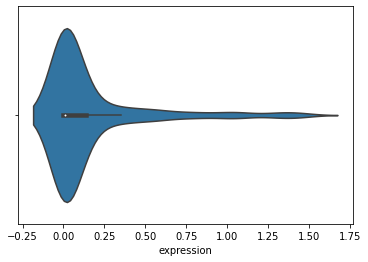

In [272]:
seaborn.violinplot(repressed_compartment["expression"])